In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

In [37]:
population_estimates_and_growth_by_gender_df = pd.read_csv('Datasets\\Population\\Population_Estimates_and_Growth_by_Gender.csv')
population_indicators_df = pd.read_csv('Datasets\\Population\\Population_Indicators.csv')

# Population Estimates and Growth by Gender

## Data Understanding

In [38]:
population_estimates_and_growth_by_gender_df.head()

,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1970,149195,NaN
1,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1971,181473,NaN
2,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1972,221774,NaN
3,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1973,268398,NaN
4,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1974,322544,NaN


In [39]:
population_estimates_and_growth_by_gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       162 non-null    object 
 1   MEASURE        162 non-null    object 
 2   POP_IND        162 non-null    object 
 3   UNIT_MEASURE   162 non-null    object 
 4   REF_AREA       162 non-null    object 
 5   FREQ           162 non-null    object 
 6   GENDER         162 non-null    object 
 7   SOURCE_DETAIL  162 non-null    object 
 8   TIME_PERIOD    162 non-null    int64  
 9   OBS_VALUE      162 non-null    int64  
 10  DECIMALS       0 non-null      float64
dtypes: float64(1), int64(2), object(8)
memory usage: 14.1+ KB


In [40]:
for column in population_estimates_and_growth_by_gender_df.columns:
    unique_values = population_estimates_and_growth_by_gender_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      1
MEASURE                       1
POP_IND                       1
UNIT_MEASURE                  1
REF_AREA                      1
FREQ                          1
GENDER                        3
SOURCE_DETAIL                 1
TIME_PERIOD                   54
OBS_VALUE                     162
DECIMALS                      0


In [41]:
for column in population_estimates_and_growth_by_gender_df.columns:
    unique_values = population_estimates_and_growth_by_gender_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      DATAFLOW
FCSA:DF_POP(2.7.0)    162
Name: count, dtype: int64
MEASURE                       MEASURE
POP    162
Name: count, dtype: int64
POP_IND                       POP_IND
_Z    162
Name: count, dtype: int64
UNIT_MEASURE                  UNIT_MEASURE
PS    162
Name: count, dtype: int64
REF_AREA                      REF_AREA
AE    162
Name: count, dtype: int64
FREQ                          FREQ
A    162
Name: count, dtype: int64
GENDER                        GENDER
M     54
F     54
_T    54
Name: count, dtype: int64
SOURCE_DETAIL                 SOURCE_DETAIL
FCSC    162
Name: count, dtype: int64
TIME_PERIOD                   TIME_PERIOD
1970    3
2010    3
1999    3
2000    3
2001    3
2002    3
2003    3
2004    3
2005    3
2006    3
2007    3
2008    3
2009    3
2011    3
1971    3
2012    3
2013    3
2014    3
2015    3
2016    3
2017    3
2018    3
2019    3
2020    3
2021    3
2022    3
1998    3
1997    3
1996    3
1995    3
1972    3
1973    3
19

In [42]:
population_estimates_and_growth_by_gender_df.duplicated().sum()

0

In [43]:
population_estimates_and_growth_by_gender_df.isnull().sum()

DATAFLOW           0
MEASURE            0
POP_IND            0
UNIT_MEASURE       0
REF_AREA           0
FREQ               0
GENDER             0
SOURCE_DETAIL      0
TIME_PERIOD        0
OBS_VALUE          0
DECIMALS         162
dtype: int64

array([[<Axes: title={'center': 'TIME_PERIOD'}>,
        <Axes: title={'center': 'OBS_VALUE'}>],
       [<Axes: title={'center': 'DECIMALS'}>, <Axes: >]], dtype=object)

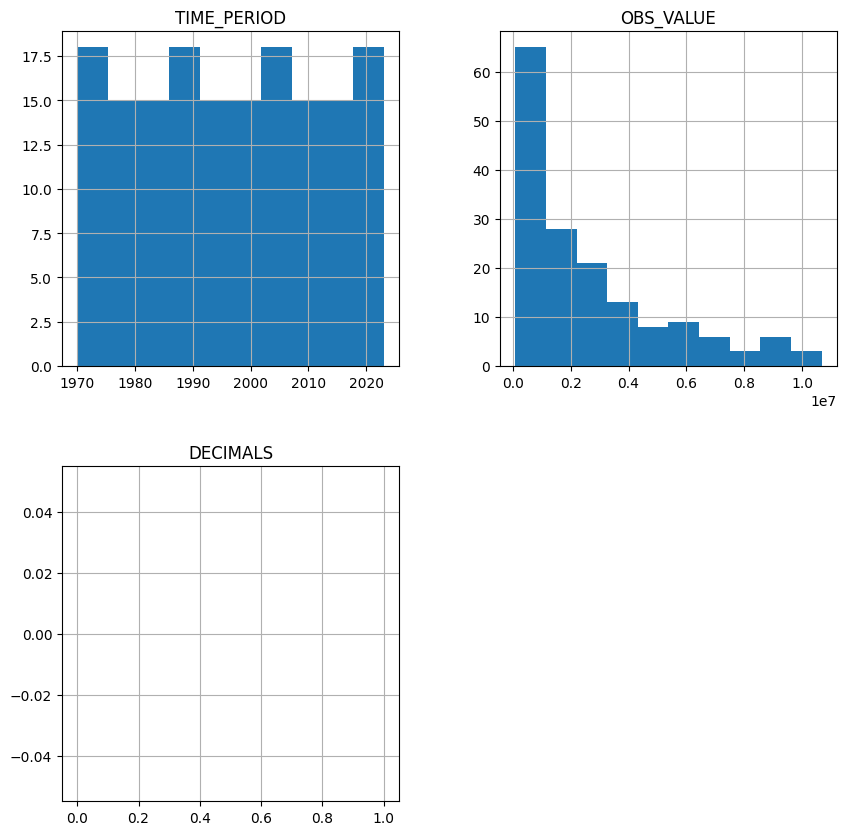

In [44]:
population_estimates_and_growth_by_gender_df.hist(figsize=(10, 10))

## Data Cleaning

In [45]:
population_estimates_and_growth_by_gender_df.drop(columns=['DECIMALS'], inplace = True)

In [46]:
cols_to_drop = [col for col in population_estimates_and_growth_by_gender_df.columns if population_estimates_and_growth_by_gender_df[col].nunique() == 1]
population_estimates_and_growth_by_gender_df = population_estimates_and_growth_by_gender_df.drop(columns=cols_to_drop)

In [47]:
population_estimates_and_growth_by_gender_df.rename(columns={'GENDER': 'Gender', 'TIME_PERIOD': 'Time Period', 'OBS_VALUE': 'Value'}, inplace=True)

In [48]:
population_estimates_and_growth_by_gender_df['Gender'] = population_estimates_and_growth_by_gender_df['Gender'].replace({
    'M': 'Male',
    'F': 'Female',
    '_T': 'Total'
})

In [49]:
population_estimates_and_growth_by_gender_df

,Gender,Time Period,Value
0,Male,1970,149195
1,Male,1971,181473
2,Male,1972,221774
3,Male,1973,268398
4,Male,1974,322544
...,...,...,...
157,Total,2019,9512778
158,Total,2020,9289297
159,Total,2021,9861007
160,Total,2022,10288946


# Population Indicators

## Data Understanding

In [50]:
population_indicators_df.head()

,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2019,31.30,1
1,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2020,32.80,1
2,FCSA:DF_POP_IND(2.7.0),POPIND,CDR,RATIO,AE,A,_Z,FCSC,2019,20.37,1
3,FCSA:DF_POP_IND(2.7.0),POPIND,CDR,RATIO,AE,A,_Z,FCSC,2020,17.90,1
4,FCSA:DF_POP_IND(2.7.0),POPIND,LEB,YEARS,AE,A,_Z,FCSC,2019,79.90,1


In [51]:
population_indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       18 non-null     object 
 1   MEASURE        18 non-null     object 
 2   POP_IND        18 non-null     object 
 3   UNIT_MEASURE   18 non-null     object 
 4   REF_AREA       18 non-null     object 
 5   FREQ           18 non-null     object 
 6   GENDER         18 non-null     object 
 7   SOURCE_DETAIL  18 non-null     object 
 8   TIME_PERIOD    18 non-null     int64  
 9   OBS_VALUE      18 non-null     float64
 10  DECIMALS       18 non-null     int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.7+ KB


In [52]:
for column in population_indicators_df.columns:
    unique_values = population_indicators_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      1
MEASURE                       1
POP_IND                       11
UNIT_MEASURE                  3
REF_AREA                      1
FREQ                          1
GENDER                        1
SOURCE_DETAIL                 1
TIME_PERIOD                   2
OBS_VALUE                     18
DECIMALS                      1


In [53]:
for column in population_indicators_df.columns:
    unique_values = population_indicators_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      DATAFLOW
FCSA:DF_POP_IND(2.7.0)    18
Name: count, dtype: int64
MEASURE                       MEASURE
POPIND    18
Name: count, dtype: int64
POP_IND                       POP_IND
MED       2
CDR       2
LEB       2
POPDEN    2
EDR       2
ADR       2
GR        2
LEBM      1
MEDM      1
LEBF      1
MEDF      1
Name: count, dtype: int64
UNIT_MEASURE                  UNIT_MEASURE
YEARS    8
RATIO    8
PS       2
Name: count, dtype: int64
REF_AREA                      REF_AREA
AE    18
Name: count, dtype: int64
FREQ                          FREQ
A    18
Name: count, dtype: int64
GENDER                        GENDER
_Z    18
Name: count, dtype: int64
SOURCE_DETAIL                 SOURCE_DETAIL
FCSC    18
Name: count, dtype: int64
TIME_PERIOD                   TIME_PERIOD
2020    11
2019     7
Name: count, dtype: int64
OBS_VALUE                     OBS_VALUE
31.300     1
32.800     1
196.890    1
20.000     1
22.430     1
2.100      1
2.057      1
130.700    1
1

In [54]:
population_indicators_df.duplicated().sum()

0

In [55]:
population_indicators_df.isnull().sum()

DATAFLOW         0
MEASURE          0
POP_IND          0
UNIT_MEASURE     0
REF_AREA         0
FREQ             0
GENDER           0
SOURCE_DETAIL    0
TIME_PERIOD      0
OBS_VALUE        0
DECIMALS         0
dtype: int64

array([[<Axes: title={'center': 'TIME_PERIOD'}>,
        <Axes: title={'center': 'OBS_VALUE'}>],
       [<Axes: title={'center': 'DECIMALS'}>, <Axes: >]], dtype=object)

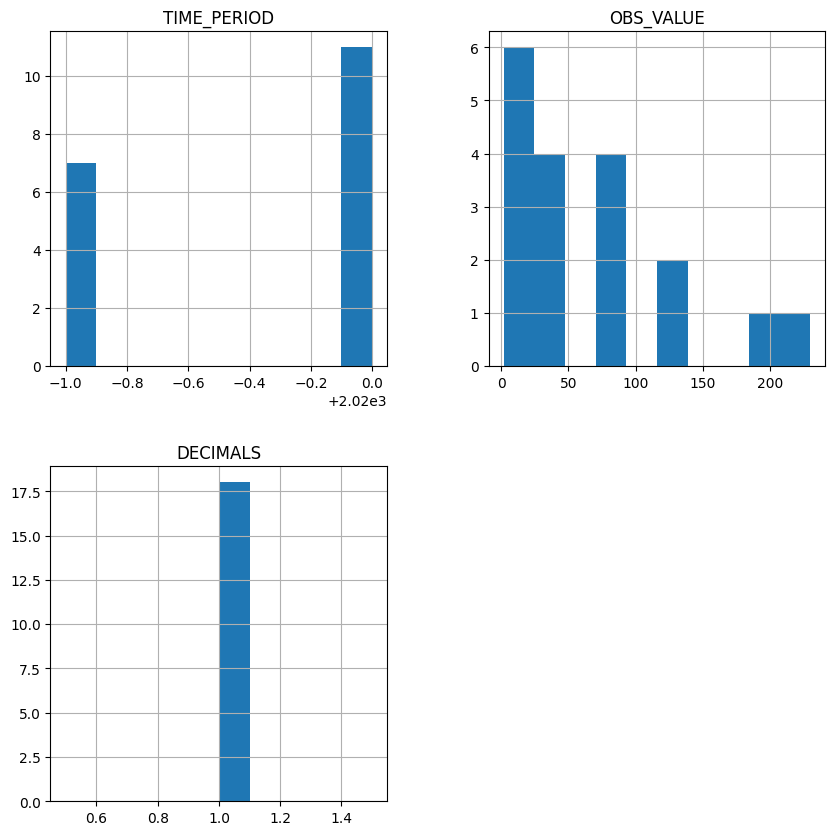

In [56]:
population_indicators_df.hist(figsize=(10, 10))

## Data Cleaning

In [57]:
cols_to_drop = [col for col in population_indicators_df.columns if population_indicators_df[col].nunique() == 1]
population_indicators_df = population_indicators_df.drop(columns=cols_to_drop)

In [58]:
population_indicators_df.rename(columns={'POP_IND': 'Population Indicator', 'UNIT_MEASURE': 'Unit of Measure', 'TIME_PERIOD': 'Time_Period', 'OBS_VALUE': 'Value'}, inplace=True)

In [59]:
population_indicators_df['Population Indicator'] = population_indicators_df['Population Indicator'].replace({
    'GR': 'Gender Ratio',
    'LEB': 'Life expectancy at birth (in years)',
    'LEBM': 'Life expectancy at birth for males (in years)',
    'LEBF': 'Life exepctancy at birth for females (in years)',
    'MED': 'Median age (in years)',
    'MEDM': 'Median age for males (in years)',
    'MEDF': 'Median age for females (in years)',
    'ADR': 'Age dependancy ratio',
    'CDR': 'Children dependancy ratio',
    'EDR': 'Elderly dependancy ratio',
    'POPDEN': 'Population density (per km2)',
    })

In [60]:
population_indicators_df['Unit of Measure'] = population_indicators_df['Unit of Measure'].replace({
    'RATIO': 'Ratio',
    'YEARS': 'Years',
    'PS': 'Persons'
    })

In [61]:
population_indicators_df

,Population Indicator,Unit of Measure,Time_Period,Value
0,Median age (in years),Years,2019,31.300
1,Median age (in years),Years,2020,32.800
2,Children dependancy ratio,Ratio,2019,20.370
3,Children dependancy ratio,Ratio,2020,17.900
4,Life expectancy at birth (in years),Years,2019,79.900
5,Life expectancy at birth (in years),Years,2020,79.700
6,Life expectancy at birth for males (in years),Years,2020,78.000
7,Median age for males (in years),Years,2020,33.500
8,Life exepctancy at birth for females (in years),Years,2020,81.400
9,Median age for females (in years),Years,2020,31.200


# Pumping Data into Mongodb

In [62]:
# from pymongo import MongoClient
# from dotenv import load_dotenv
# import os

# # Connect to MongoDB
# load_dotenv()

# client = MongoClient(os.environ['MONGODB_URI_1'])  # Uses the connection string from your .env file
# db = client['tourism_db']

# # Convert DataFrame to dictionary
# population_estimates_and_growth_by_gender_df = population_estimates_and_growth_by_gender_df.to_dict('records')
# population_indicators_df = population_indicators_df.to_dict('records')

# # Insert into MongoDB collections
# db['guests_by_hotel_type_by_region'].insert_many(population_estimates_and_growth_by_gender_df)
# db['population_indicators_df'].insert_many(population_indicators_df)

# print("Data pumped into MongoDB successfully!")

Data pumped into MongoDB successfully!
